In [1]:
from pprint import pprint
import pandas as pd
import os
import glob
  

path = os.getcwd()
files = glob.glob(os.path.join(path+"\ml-latest-small", "*.csv"))
files_lst = []
for f in files:

    df = pd.read_csv(f)
    files_lst.append(df)
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    print()

Location: S:\Fall2021\CSE482\ml-latest-small\links.csv
File Name: links.csv
Content:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0



Location: S:\Fall2021\CSE482\ml-latest-small\movies.csv
File Name: movies.csv
Content:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation



Location: S:\Fall2021\CSE482\ml-latest-small\ratings.csv
File Name: ratings.csv
Content:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352



Location: S:\Fall2021\CSE482\ml-latest-small\tags.csv
File Name: tags.csv
Content:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [5]:
# merge the data frame
temp = files_lst[0]

for i in range(1,len(files_lst)):
    temp = pd.merge(left = temp, right = files_lst[i], how = 'left')
temp = temp.sort_values(by=['userId'])
#pd.set_option('display.max_rows', 1000000)
temp = temp.iloc[:,:-1]
temp = temp.dropna()
temp.head()

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0
35549,1777,120888,11003.0,"Wedding Singer, The (1998)",Comedy|Romance,1.0,4.0,964981230.0
35250,1732,118715,115.0,"Big Lebowski, The (1998)",Comedy|Crime,1.0,5.0,964981125.0
34349,1676,120201,563.0,Starship Troopers (1997),Action|Sci-Fi,1.0,3.0,964982620.0
2379,50,114814,629.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1.0,5.0,964982931.0


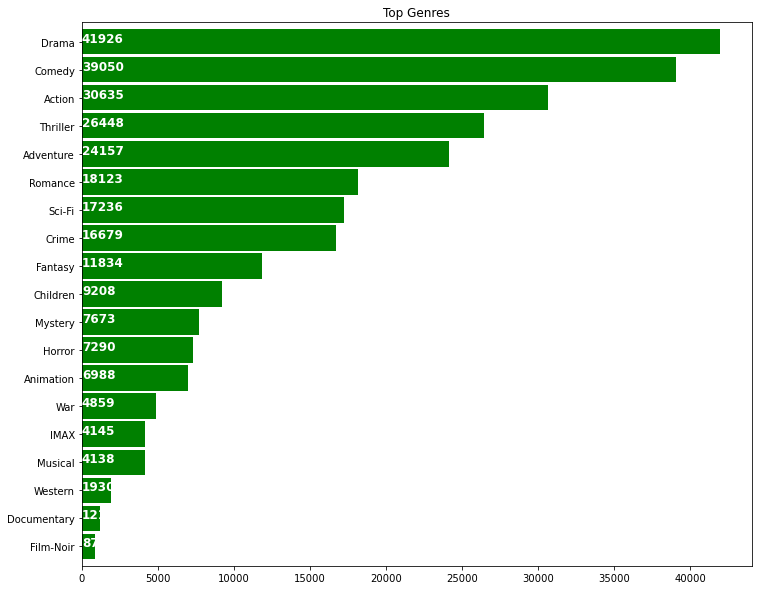

{'Children', 'Comedy', 'Musical', 'Action', 'Film-Noir', '(no genres listed)', 'Adventure', 'IMAX', 'Sci-Fi', 'Mystery', 'Drama', 'Horror', 'Animation', 'Documentary', 'Crime', 'Romance', 'War', 'Western', 'Thriller', 'Fantasy'}


In [6]:
%matplotlib inline  
from matplotlib import pyplot as plt 
plt.subplots(figsize=(12,10))
list1 = []
set_1 = set()
gen_lst = []
for i in temp['genres']:
    #print(i)
    i_lst = i.split('|')
    #print(i_lst)
    temp_set = set(i_lst)
    set_1 = set_1.union(temp_set)
    list1.extend(i_lst)
    gen_lst.append(i_lst)
l = len(set_1) -1
ax = pd.Series(list1).value_counts()[:l].sort_values(ascending=True).plot.barh(width=0.9,color='green')
for i, v in enumerate(pd.Series(list1).value_counts()[:l].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()
print(set_1)

In [9]:
Rating = files_lst[2]
Mean = Rating.groupby(by="userId",as_index=False)['rating'].mean()

In [12]:
Rating_avg = pd.merge(Rating,Mean,on='userId')
Rating_avg['adg_rating']=Rating_avg['rating_x']-Rating_avg['rating_y']
Rating_avg.head()

,userId,movieId,rating_x,timestamp,rating_y,adg_rating
0,1,1,4.0,964982703,4.366379,-0.366379
1,1,3,4.0,964981247,4.366379,-0.366379
2,1,6,4.0,964982224,4.366379,-0.366379
3,1,47,5.0,964983815,4.366379,0.633621
4,1,50,5.0,964982931,4.366379,0.633621


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
final=pd.pivot_table(Rating_avg,values='adg_rating',index='userId',columns='movieId')
final_movie = final.fillna(final.mean(axis=0))
final_movie.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,-0.053158,-0.366379,-1.096045,-0.522626,-0.366379,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
2,0.312167,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
3,0.312167,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
4,0.312167,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
5,0.363636,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024


In [21]:
import numpy as np
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)
cosine = cosine_similarity(final_movie)
np.fill_diagonal(cosine, 0 )
similarity_with_movie =pd.DataFrame(cosine,index=final_movie.index)
similarity_with_movie.columns=final_user.index
similarity_with_movie.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.988283,0.978406,0.964220,0.986819,0.970456,0.971643,0.987468,0.986382,0.973397,...,0.987335,0.978916,0.917922,0.983978,0.978638,0.959693,0.976120,0.932806,0.989380,0.952774
2,0.988283,0.000000,0.987141,0.971166,0.995793,0.979893,0.981852,0.995168,0.995108,0.981285,...,0.996067,0.988455,0.929086,0.993014,0.988206,0.968868,0.983619,0.940224,0.997957,0.963114
3,0.978406,0.987141,0.000000,0.961237,0.985179,0.970773,0.971932,0.985140,0.985263,0.971464,...,0.986072,0.978562,0.921433,0.983193,0.978363,0.957067,0.974114,0.930653,0.988086,0.954265
4,0.964220,0.971166,0.961237,0.000000,0.968638,0.955187,0.958876,0.970090,0.969158,0.959626,...,0.970625,0.964815,0.903118,0.967106,0.963962,0.942701,0.958891,0.911591,0.972100,0.935866
5,0.986819,0.995793,0.985179,0.968638,0.000000,0.978368,0.980011,0.992905,0.993494,0.979161,...,0.994448,0.986028,0.928126,0.991066,0.986090,0.967230,0.982366,0.938353,0.996584,0.960854


In [34]:

b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,0.000000e+00,1.290714e-29,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,1.371140e-29,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-3.923776e-30,-1.537935e-29,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,1.290714e-29,0.000000e+00,-0.011260,-0.031539,0.004800,8.818877e-30,-0.032471,8.338880e-30,1.764256e-30,...,-0.004904,-0.016117,0.017749,-2.193111e-30,-1.430628e-03,-0.037289,-0.007789,-0.013001,9.842620e-30,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,0.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,0.000000,0.009111,1.011715e-02,-0.012284,4.245419e-30,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278


In [22]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [24]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=30)
knn.fit(similarity_with_movie)

NearestNeighbors(n_neighbors=30)

In [32]:
pprint(knn.kneighbors(similarity_with_movie, return_distance=False))

array([[  0, 194, 316, ..., 499, 112, 356],
       [  1, 337, 322, ..., 336, 398, 558],
       [  2, 367, 381, ..., 355,  72, 324],
       ...,
       [607, 599, 159, ..., 609, 390, 482],
       [608,  93,  80, ...,  70, 116,  78],
       [609, 304, 461, ..., 479, 273, 488]], dtype=int64)


In [35]:
# Source:
# https://github.com/ashaypathak/Recommendation-system/blob/master/Movie_Recommendation.ipynb
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df
# top 30 neighbours for each user
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
sim_user_30_u.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,
1,301,597,414,477,57,369,206,535,590,418,...,484,469,72,593,44,297,434,483,449,552
2,189,246,378,209,227,326,393,332,196,528,...,114,153,596,495,407,567,93,308,496,222
3,441,496,549,231,527,537,313,518,244,246,...,309,586,230,303,34,161,39,47,127,138
4,75,137,590,391,43,128,462,250,290,85,...,472,593,299,32,349,268,159,199,173,426
5,145,35,565,134,58,444,446,347,530,142,...,94,569,411,588,584,404,498,323,536,437


In [36]:
# top 30 neighbours for each user
sim_user_30_m = find_n_neighbours(similarity_with_movie,30)
sim_user_30_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,
1,49,54,72,53,515,550,189,133,26,513,...,145,60,595,574,556,92,435,163,439,340
2,49,189,515,53,25,145,54,26,87,194,...,65,163,251,150,299,440,519,507,245,521
3,515,49,25,53,496,54,442,72,26,87,...,92,595,556,65,463,251,180,150,163,439
4,581,54,189,49,25,515,300,53,472,251,...,26,289,463,609,214,206,507,574,120,556
5,145,49,515,53,609,26,189,550,35,87,...,293,142,72,92,556,439,478,163,595,299


In [39]:
similarity_with_movie.shape

(610, 610)